In [1]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn.metrics import r2_score
import pylab as pl
from itertools import cycle

import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import numpy as np
from scipy import stats

from itertools import cycle

iris = load_iris()

numSamples, numFeatures = iris.data.shape
print(numSamples)
print(numFeatures)
print(list(iris.target_names))
print(list(iris))

150
4
['setosa', 'versicolor', 'virginica']
['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']


In [2]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [3]:
X = iris.data
pca = PCA(n_components=2, whiten=True).fit(X)
X_pca = pca.transform(X)


In [4]:
print(pca.components_)

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]


In [5]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.92461872 0.05306648]
0.977685206318795


In [6]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

range(0, 3)


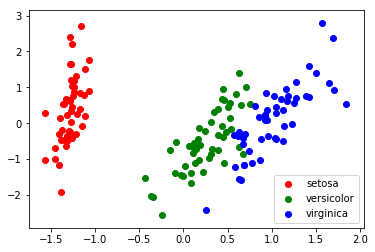

In [7]:
%matplotlib inline
from pylab import *

colors = cycle('rgb')
target_ids = range(len(iris.target_names))
print(target_ids)
pl.figure()
for i, c, label in zip(target_ids, colors, iris.target_names):
    pl.scatter(X_pca[iris.target == i, 0], X_pca[iris.target == i, 1],
        c=c, label=label)
pl.legend()
pl.show()

In [8]:
X = iris.data
pca = PCA(n_components=1, whiten=True).fit(X)
X_pca = pca.transform(X)

In [9]:
print(pca.components_)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]]
[0.92461872]
0.9246187232017271


range(0, 3)


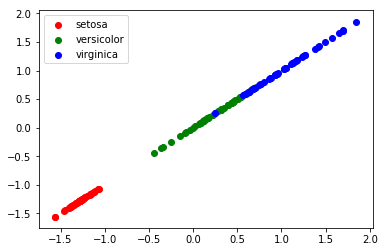

In [10]:
%matplotlib inline
from pylab import *

colors = cycle('rgb')
target_ids = range(len(iris.target_names))
print(target_ids)
pl.figure()
for i, c, label in zip(target_ids, colors, iris.target_names):
    pl.scatter(X_pca[iris.target == i, 0], X_pca[iris.target == i, 0],
        c=c, label=label)
pl.legend()
pl.show()

5.843333333333334 7.9 4.3


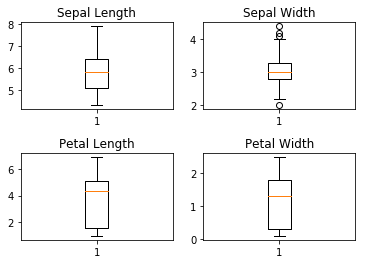

In [11]:
list(iris)
sepalL = iris.data[:,0]
sepalW = iris.data[:,1]
petalL = iris.data[:,2]
petalW = iris.data[:,3]

meanSepalL= np.mean(iris.data[:,0])
maxSepalL=np.max(iris.data[:,0])
minSepalL = np.min(iris.data[:,0])
print(meanSepalL, maxSepalL,minSepalL)

fig, axs = plt.subplots(2,2)
fig.subplots_adjust(hspace = 0.5)

plt.subplot(221)
plt.boxplot(sepalL)
plt.title("Sepal Length")
plt.subplot(222)
plt.boxplot(sepalW)
plt.title("Sepal Width")
plt.subplot(223)
plt.boxplot(petalL)
plt.title("Petal Length")
plt.subplot(224)
plt.boxplot(petalW)
plt.title("Petal Width")
plt.show()


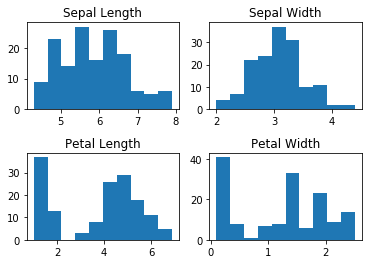

In [12]:
fig, axs = plt.subplots(2,2)
fig.subplots_adjust(hspace = 0.5)

plt.subplot(221)
plt.hist(sepalL)
plt.title("Sepal Length")
plt.subplot(222)
plt.hist(sepalW)
plt.title("Sepal Width")
plt.subplot(223)
plt.hist(petalL)
plt.title("Petal Length")
plt.subplot(224)
plt.hist(petalW)
plt.title("Petal Width")
plt.show()

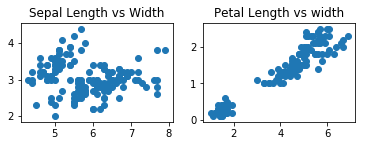

In [13]:
fig, axs = plt.subplots(1,2)

plt.subplot(221)
plt.scatter(sepalL,sepalW)
plt.title("Sepal Length vs Width")
plt.subplot(222)
plt.scatter(petalL, petalW)
plt.title("Petal Length vs width")
plt.show()

In [14]:
print(stats.ttest_ind(sepalL,sepalW))
print(stats.ttest_ind(petalL,petalW))

Ttest_indResult(statistic=36.463283934449116, pvalue=7.027919392009369e-112)
Ttest_indResult(statistic=16.297385118572553, pvalue=3.883537681963073e-43)


In [15]:
trainXsepalL = sepalL[:125]
trainYsepalW = sepalW[:125]
testXsepalL = sepalL[125:]
testYsepalW = sepalW[125:]

print(len(trainXsepalL))
print(len(trainYsepalW))
print(len(testXsepalL))
print(len(testYsepalW))

125
125
25
25


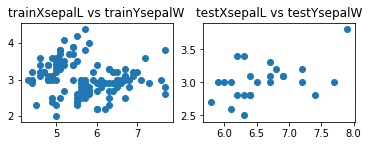

In [16]:
fig, axs = plt.subplots(1,2)

plt.subplot(221)
plt.scatter(trainXsepalL,trainYsepalW)
plt.title("trainXsepalL vs trainYsepalW")
plt.subplot(222)
plt.scatter(testXsepalL,testYsepalW)
plt.title("testXsepalL vs testYsepalW")
plt.show()

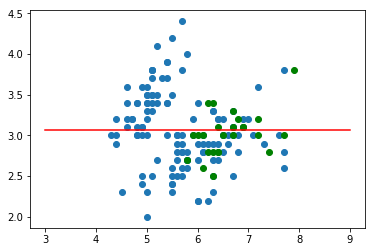

In [17]:
p4 = np.poly1d(np.polyfit(trainXsepalL, trainYsepalW, 0.2))
xp = np.linspace(3, 9, 100)
plt.scatter(trainXsepalL,trainYsepalW)
plt.scatter(testXsepalL,testYsepalW, c= 'g')
plt.plot(xp, p4(xp), c='r')
plt.show()

In [18]:
r2 = r2_score(testYsepalW, p4(testXsepalL))
print("r2 for test data: ", r2)
r2 = r2_score(trainYsepalW, p4(trainXsepalL))
print("re for train data: ", r2)

r2 for test data:  -0.02697634408602201
re for train data:  1.1102230246251565e-16
